In [119]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.linalg import block_diag

from util import *
from thirring import *

In [120]:
def print_pk(qca, k0, p0=0):
    pk = qca.get_pk(i=0)
    plt.xlabel('k')
    plt.ylabel(r'$\vert{c_k}\vert^2$')
    plt.title('Mode decomposition')
    f = lambda x: (x+np.pi)%(2*np.pi) - np.pi
    plt.xticks([f(p0+k0), f(p0+k0-np.pi), f(p0-k0), f(p0-k0+np.pi)], 
               [r'$p0+k_0$', r'$p_0+k_0-\pi$', r'$p_0-k_0$', r'$p_0+\pi-k_0$'])
    plt.plot(np.arange(-L, L)*np.pi/L, np.abs(pk)**2)
    
def plot_px(qw):
    ps = []
    purity = []
    for i in range(qw.n_particles):
        ps_i = qw.get_px(i)
        purity_i = qw.get_purity(0)
        ps.append(ps_i)
        purity.append(purity_i)
    ps = sum(ps)
    plt.title('Position probability distribution')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    for i in range(qw.n_particles):
        print(f'P{i+1}={np.real(purity[i]):.2f}', end=' ')
    print()
    p = plt.plot(range(-qw.L, qw.L), ps)
    return p

# Scattering in the Thirring model

## Contact potential

In [121]:
%%time
n = 2
chi = 0
theta = np.pi/4
L = 100
qca = Thirring(L=L, n_particles=n, theta=theta, chi=chi) 

CPU times: user 3.12 ms, sys: 6.84 ms, total: 9.96 ms
Wall time: 13.1 ms


Let's first consider the free evolution

P1=0.50 P2=0.50 
P1=0.50 P2=0.50 
P1=0.50 P2=0.50 
P1=0.50 P2=0.50 
P1=0.50 P2=0.50 
P1=0.50 P2=0.50 


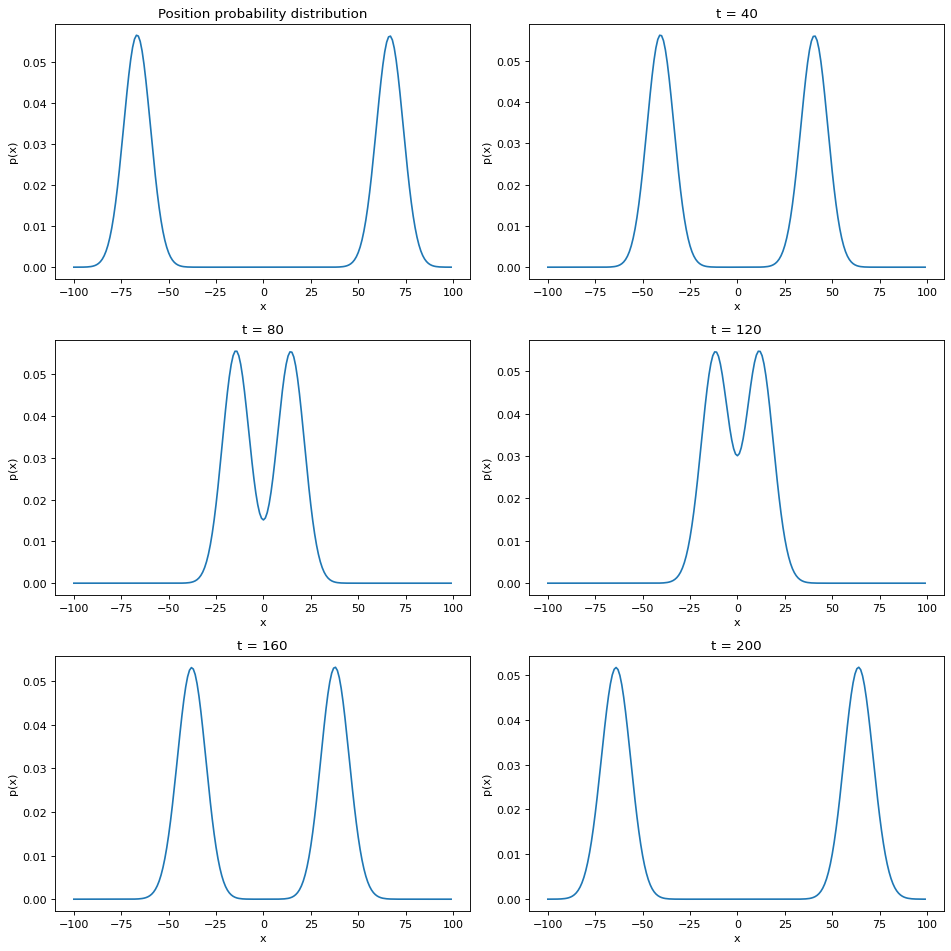

In [122]:
k0 = np.pi/3
k0s = [k0, -k0]
x0s = [-2*L/3, 2*L/3]
sigma_k_s = 2*[0.1]
signs = 2*[1]
qca.psi = qca.in_state(k0s, x0s, sigma_k_s, signs)
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plt.title(f't = 0')
n_steps = 5
step = 40
plot_px(qca)
for i in range(n_steps):
    qca.evolve(step)
    fig.add_subplot(3, 2, i+2)
    plot_px(qca)
    plt.title(f't = {step*(i+1)}')
fig.tight_layout()
plt.show()

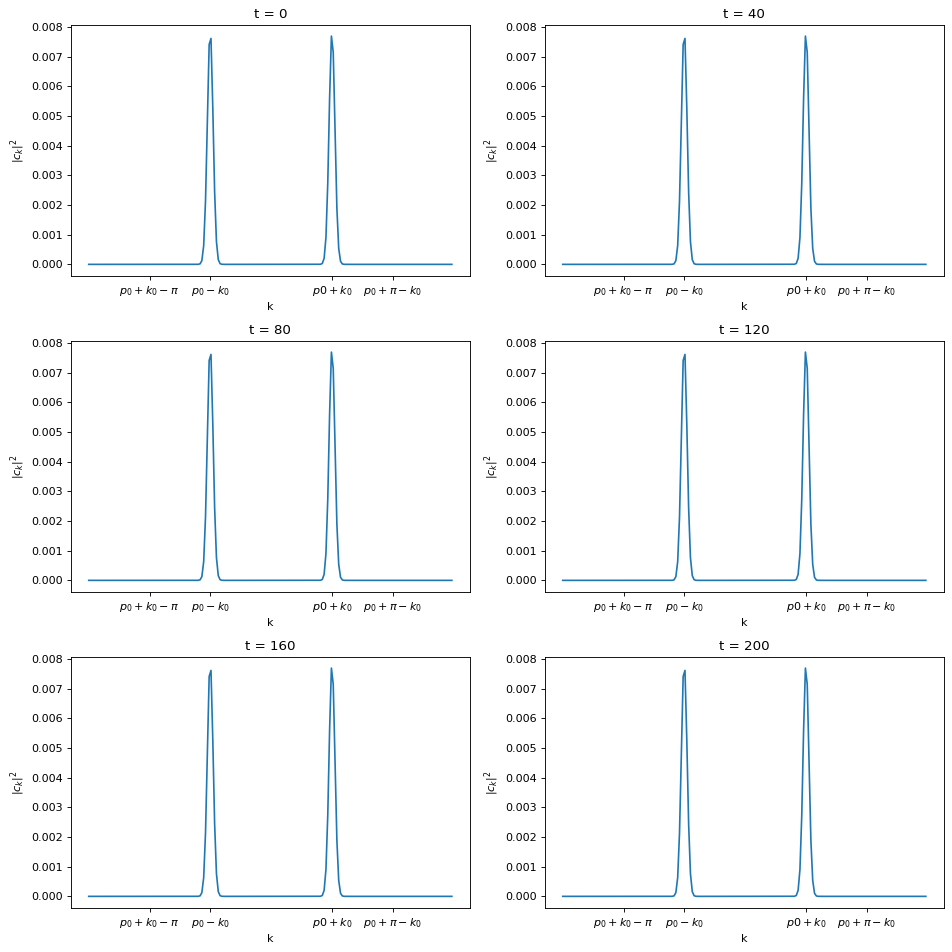

In [123]:
qca.psi = qca.in_state(k0s, x0s, sigma_k_s, signs)
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
print_pk(qca, k0)
plt.title(f't = 0')
n_steps = 5
step = 40
for i in range(n_steps):
    qca.evolve(step)
    fig.add_subplot(3, 2, i+2)
    print_pk(qca, k0)
    plt.title(f't = {step*(i+1)}')
fig.tight_layout()
plt.show()

Now, with interactions.

In [142]:
signs = [1, 1]
sigma_k_s = [0.2, 0.2]
x0 = 20
x0s = [-x0, x0]
dk = np.pi/L
k0 = L*dk/4
p0 = 0
k0s = [p0+k0, p0-k0]

In [143]:
chi = np.pi/4
qca = Thirring(L=L, n_particles=n, theta=theta, chi=chi)
qca.psi = qca.in_state(k0s, x0s, sigma_k_s, signs)

P1=0.50 P2=0.50 
P1=0.47 P2=0.47 
P1=0.45 P2=0.45 
P1=0.45 P2=0.45 
P1=0.45 P2=0.45 
P1=0.45 P2=0.45 


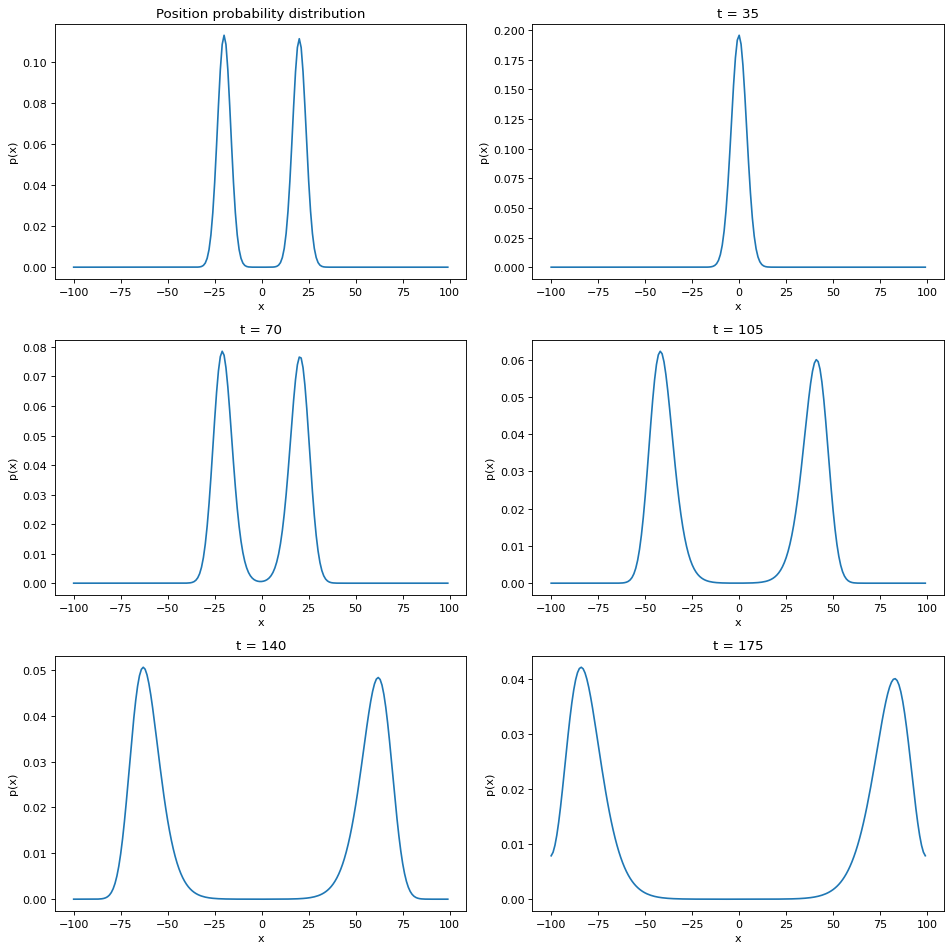

In [144]:
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plt.title(f't = 0')
plot_px(qca)
n_steps = 5
step = 35
for i in range(n_steps):
    qca.evolve(step)
    fig.add_subplot(3, 2, i+2)
    plot_px(qca)
    plt.title(f't = {step*(i+1)}')
fig.tight_layout()
plt.show()

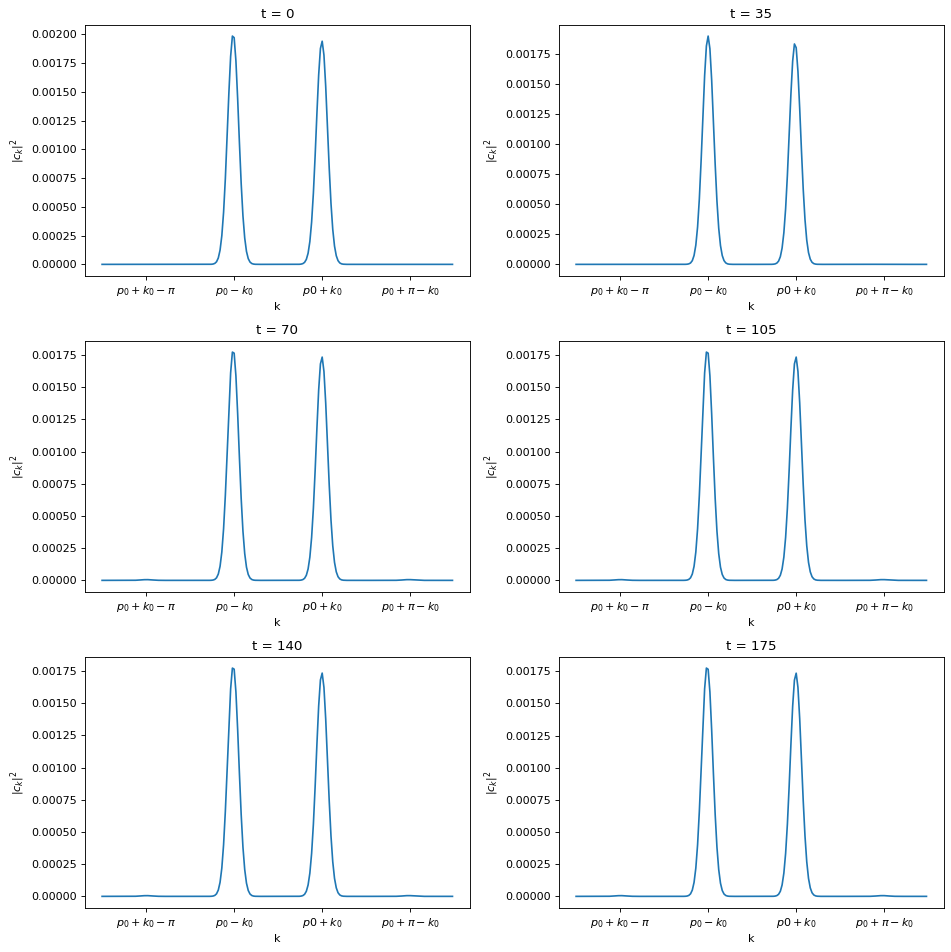

In [145]:
qca.psi = qca.in_state(k0s, x0s, sigma_k_s, signs)
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
print_pk(qca, k0, p0)
plt.title(f't = 0')
for i in range(n_steps):
    qca.evolve(step)
    fig.add_subplot(3, 2, i+2)
    print_pk(qca, k0, p0)
    plt.title(f't = {step*(i+1)}')
fig.tight_layout()
plt.show()

## Smeared Potential

Smearing the potential, even by just a little, removes the spurious scatterings. 

In [23]:
%%time
n = 2
theta = np.pi/4
L = 100
sigma_V = 0.5
chi = np.pi*0.63
qca = Thirring(L=L, n_particles=n, theta=theta, chi=chi, sigma_V=sigma_V) 

CPU times: user 194 ms, sys: 4.88 ms, total: 199 ms
Wall time: 199 ms


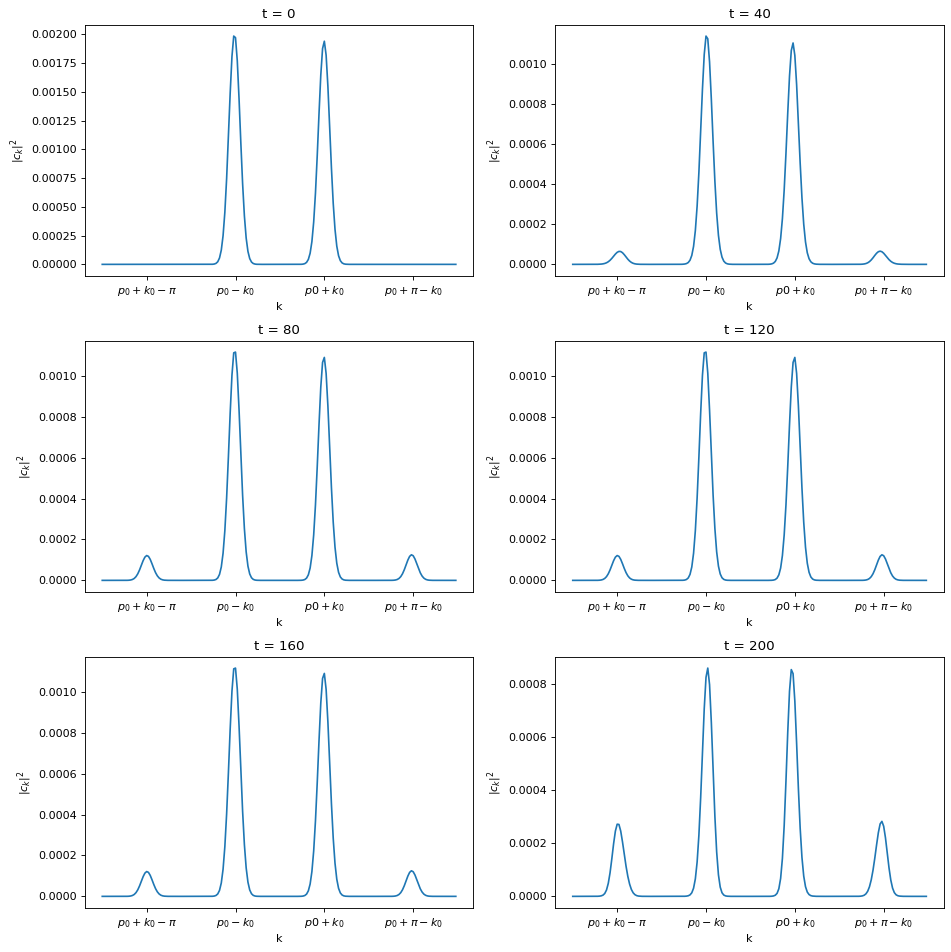

In [117]:
qca.psi = qca.in_state(k0s, x0s, sigma_k_s, signs)
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
print_pk(qca, k0)
plt.title(f't = 0')
n_steps = 5
step = 40
for i in range(n_steps):
    qca.evolve(step)
    fig.add_subplot(3, 2, i+2)
    print_pk(qca, k0)
    plt.title(f't = {step*(i+1)}')
fig.tight_layout()
plt.show()